<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Jesús Sebastián González Ortiz y Mateo Verea Dorantes.

**Fecha:** 12 de octubre del 2021.

**Expediente** : 721621 y 709396.
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/SebasGlez2000/Tarea6_JSGonzalez_MVDorantes

# Tarea 5: Clase 9

In [1]:
from scipy import optimize
import numpy as np
from scipy.stats import beta
import matplotlib.pyplot as plt

## Enunciado de tarea (Transcibirlo)
    
> Para las siguiente dos funciones, genere muestres aleatorias que distribuyan según la función dada usando el método de la transformada inversa y grafique el histograma de 1000 muestras generadas con el método de la transformada inversa y compárela con el función $f(x)$ **(recuerde que $f(x)$ es la distribución de probabilidad y $F(x)$ es la distribución de probabilidad acumulada)** [ver este enlace para más información](https://es.wikipedia.org/wiki/Funci%C3%B3n_de_distribuci%C3%B3n). Este procedimiento se realiza con el fín de validar que el procedimiento y los resultados son correctos.

### Ejercicio 1:

> 1. Generación variable aleatoria continua
>El tiempo en el cual un movimiento browniano se mantiene sobre su punto máximo en el intervalo [0,1] tiene una distribución
>$$F(x)=\frac{2}{\pi}\sin^{-1}(\sqrt x),\quad 0\leq x\leq 1$$ </font>

<ipython-input-2-a1ec57c071aa>:4: RuntimeWarning: divide by zero encountered in true_divide
  func = lambda x: 1/(np.pi * np.sqrt(x) * np.sqrt(1-x))


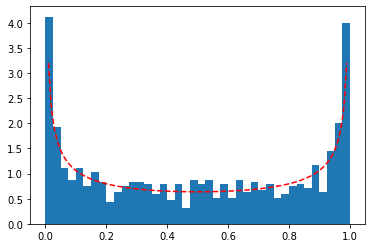

In [2]:
# Código de solución estudiante 1

sim = 1000
func = lambda x: 1/(np.pi * np.sqrt(x) * np.sqrt(1-x))
func_inv = lambda x: np.sin((x * np.pi)/2) ** 2

def funcion(func, func_inv, sim):
    p1 = np.arange(0, 1, .01)
    p2 = np.random.uniform(0, 1, sim)
    funcion = func(p1)
    inversa = func_inv(p2)
    
    plt.plot(p1,funcion,'r--')
    plt.hist(inversa, bins=40, density=True)
    plt.show()
    return

funcion(func, func_inv, sim)


Código de solución estudiante 2

In [3]:
# Código de solución estudiante 2
#definimos la derivada y su inversa
N = 10000
fx = lambda x: 1/(np.pi*np.sqrt(1-x)*np.sqrt(x))
inversa = lambda y: np.sin(y*np.pi/2)**2 

In [4]:
def ej1(fx,inversa,N): #Definimos la función
    u = np.random.uniform(0,1,N)
    x = np.arange(0,1,.01)
    funcion = inversa(u)
    fx = fx(x)
    plt.plot(x,fx,'r--')
    plt.hist(funcion, bins=40, density=True)
    plt.show()

<ipython-input-3-9438400b30eb>:4: RuntimeWarning: divide by zero encountered in true_divide
  fx = lambda x: 1/(np.pi*np.sqrt(1-x)*np.sqrt(x))


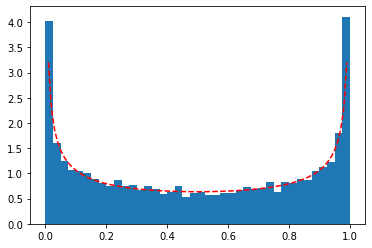

In [5]:
ej1(fx,inversa,N)

Primero se programan las funciones que nos van a ayudar que son la función derivada y la inversa de la misma fórmula de distribución que nos dieron, después definimos una función que nos ayuda a generar y graficar los puntos dentro de un histograma entre los intervalos 0 y 1 para la visualización de los datos.

### Ejercicio 2:

> 2. Generación variable aleatoria Discreta
> La distribución binomial modela el número de éxitos de n ensayos independientes donde hay una probabilidad p de éxito en cada ensayo.
> Generar una variable aletoria binomial con parámetros $n=10$ y $p=0.7$. Recordar que $$X\sim binomial(n,p) \longrightarrow p_i=P(X=i)=\frac{n!}{i!(n-i)!}p^i(1-p)^{n-i},\quad i=0,1,\cdots,n$$
> Por propiedades de la operación factorial la anterior $p_i$ se puede escribir como:
> $$p_{i+1}=\frac{n-i}{i+1}\frac{p}{1-p} p_i $$

> **Nota:** Por notación recuerde que para el caso continuo $f(x)$ es la distribución de probabilidad (PDF), mientras $F(x)$ corresponde a la distribución de probabilidad acumulada (CDF). Para el caso discreto, $P(X=i)$ corresponde a su distribución de probabilidad (PMF) y $ F_{X}(x)=\operatorname {P} (X\leq x)=\sum _{x_{i}\leq x}\operatorname {P} (X=x_{i})=\sum _{x_{i}\leq x}p(x_{i})$, corresponde a su distribución de probabilidad acumulada (CDF).


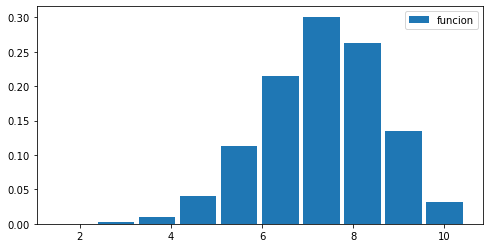

In [6]:
# Estudiante 1

sim = 1000
n = 10
p = 0.7

def distdisc(x,probacum):
    v = np.array(list(map(lambda h:sum(1 for i in probacum if i<x[h]),range(N))))
    return v

def hist(dist):
    y,x = np.histogram(dist,bins = len(set(dist)),density = True) 
    plt.figure(figsize=[8,4])
    plt.bar(x[1:],y,label='funcion')
    plt.legend()
    plt.show()
    
def acumulado(n,p):
    R = np.zeros(n)
    R[0] = (1-p)**n
    def r(i):
        nonlocal R
        c  = p/(1-p)
        R[i+1]=(c*(n-i)/(i+1))*R[i]
    [r(i) for i in range(n-1)]
    return np.cumsum(R)

n = 10
p = 0.7
N = 10000

acum = acumulado(n,p)
u = np.random.rand(N)

d_binomial = distdisc(u,acum)
hist(d_binomial)

In [7]:
# Estudiante 2
def distdisc(x,probacum):
    v = np.array(list(map(lambda h:sum(1 for i in probacum if i<x[h]),range(N))))
    return v

In [8]:
def hist(dist):
    y,x = np.histogram(dist,bins = len(set(dist)),density = True) 
    plt.figure(figsize=[8,4])
    plt.bar(x[1:],y,label='funcion')
    plt.legend()
    plt.show()
    

In [9]:
def acumulado(n,p):
    R = np.zeros(n)
    R[0] = (1-p)**n
    def r(i):
        nonlocal R
        c  = p/(1-p)
        R[i+1]=(c*(n-i)/(i+1))*R[i]
    [r(i) for i in range(n-1)]
    return np.cumsum(R)

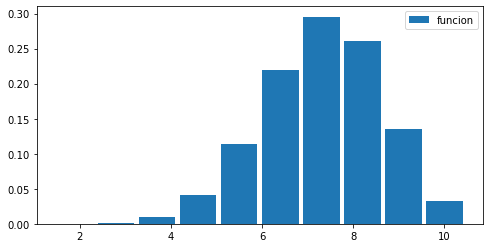

In [10]:
n = 10
p = 0.7
N = 10000

acum = acumulado(n,p)
u = np.random.rand(N)

d_binomial = distdisc(u,acum)
hist(d_binomial)